In [1]:
from CellularAutomaton import *
from IPython.display import display
import inspect
from math import *
%matplotlib inline
import matplotlib
from random import uniform
from matplotlib import pyplot as plt
from matplotlib import animation
matplotlib.rc('animation', html='html5')
goldenratio=1/2*(1+sqrt(5))
fsx=7
fsy=fsx/goldenratio
def InfoDocString(function):
    """Function to return function definition and document string."""
    
    code = inspect.getsource(function)
    docstring = inspect.getdoc(function)
    return code[0:code.find(':')+1].lstrip() +'\n' + docstring

In [9]:
class firegrid(CAGrid):
    def SetValue(self):
        print('in set value')
        for y in range(rows):
            for x in range(columns):
                if self['Burning'][y][x]:
                    self['Value'][y][x]=(1,0,0)
                elif self['Tree'][y][x]:
                    self['Value'][y][x]=(0,1,0)
                else:
                    self['Value'][y][x]=(0,0,1)
    def Update(self):
        #numpy.place(self.cond,self.TrueArray,False) #initialize condition with false values
        #for n in self.Neighbors:
         #   numpy.place(self.cond, n['Burning'],True) #if neighbor is burning, condition =true (will use later)
        numpy.place(self['Empty'],self['Burning'],True) #if cell is burning, set cell to empty on next iteration
        numpy.place(self['Burning'],self['Burning'],False) 
        numpy.place(self['Tree'],self['Empty'],False)
        #numpy.place(self['Burning'],self.cond, True) #if neighbor burning and tree set cell to burning on next iteration
        #numpy.place(self.cond, numpy.logical_not(self['Tree']),False) #if not a tree, will not burn in next iteration
        self.SetValue()
        self.SetBoundary()

In [10]:
def init(grid, rows, columns, probtree, probburning):
        for y in range(rows):
            for x in range(columns):
                #grid['ProbImmune'][y][x]  = random() * 4
                if random() < probtree:
                    MyGrid['Tree'][y][x]    = True
                    MyGrid['Burning'][y][x] = random() < probburning
                else:
                    MyGrid['Tree'][y][x]    = False
                    MyGrid['Burning'][y][x] = False
            grid.SetValue()
            grid.SetBoundary()

In [11]:
MyDtype = numpy.dtype([('Value','f', (3,)),('Empty',bool),('Tree',bool),('Burning',bool)])

#def setstates(grid, rows, columns, states):
 #   print('in set states')
    #i=0
    #for y in range(rows):
    #    for x in range(columns):
     #       grid["Empty"][y][x]=states[i]
            #i = i + 1
    #i=0
    #for y in range(rows):
     #   for x in range(columns):
      #      grid["Tree"][y][x]=states[i]
       #     i = i + 1
    #i=0
    #for y in range(rows):
     #   for x in range(columns):
      #      grid["Burning"][y][x]=states[i]
       #     i = i + 1 
    #grid.SetValue()
    #grid.SetBoundary()

In [12]:
#print(numpy.place.__doc__)

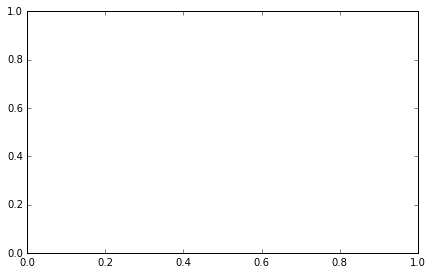

In [13]:
MyFigure, MyAxes = plt.subplots(1,1,figsize=(fsx,fsy))

In [14]:
rows = 3
columns = 3
MyGrid=firegrid((rows,columns),MyDtype)
#setstates(MyGrid, rows, columns, (0,1,0,1,0,1,0,1,0,))
#init(MyGrid,rows,columns,.4, .5)
init(MyGrid,rows,columns,0.80,0.25)
#print(MyGrid['Empty'])
#print(MyGrid['Tree'])
#print(MyGrid['Burning'])
print(MyGrid['Value'])
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
MyFigure

NameError: name 'random' is not defined

C:\Users\baldy\Anaconda3\lib\site-packages\matplotlib\image.py:238: RuntimeWarning: overflow encountered in multiply
  x = (x * 255).astype(np.uint8)


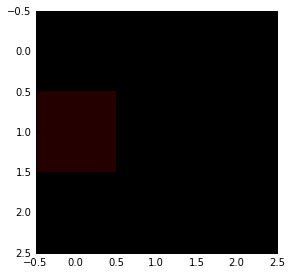

In [17]:
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
MyFigure

in set value


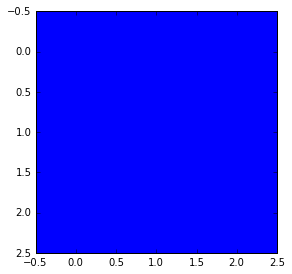

In [7]:
MyGrid.Update()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
MyFigure